##Purpose and Introduction

The purpose of this code is to build document classification model using four different approaches - bag-of-words with Naive Bayes classifier and BiLSTM model with Elmo and BERT elbedding layer. The document classification is an important task in natural language processing as it allows to automatically assigning topics to news articles, books, social media post, etc. We decided to work with BBC dataset that has collection of news articles and classes. This dataset has five categories, however for the purpose of our project, we will be using only three

###Importing Dataset

This Python code uses the Pandas library to load a dataset in CSV format from a URL, specifically the BBC news dataset. The loaded dataset is stored in a Pandas DataFrame called df. The BBC dataset contains news articles published by the BBC news website, along with their corresponding category labels. The dataset consists of 2,225 documents in five categories: Business, Entertainment, Politics, Sport, and Tech.


In [ ]:

import pandas as pd

# Load the dataset
url = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'
df = pd.read_csv(url)

# Print the first few rows of the dataset
print(df.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


In [ ]:
# Print the unique categories in the dataset
print(df['category'].unique())

['tech' 'business' 'sport' 'entertainment' 'politics']


This Python code calculates the average length of the news articles in the BBC dataset

In [ ]:
import numpy as np

d = []
for t in df['text']:
  l = len(t)
  d.append(l)
print( sum(d) / len(d))

2262.936179775281


In [ ]:
len(df)

2225

The code first imports the NLTK library, which provides tools for working with natural language text in Python. Next, we download the ‘punkt’ which is pre-trained tokenizer. We use this tokenizer for our word_tokenize() function. Next, we create new column called ‘tokenized_text” which will store the tokenized version of each article. Finally, the code applies word_tokenize() function to text colum. This function tokenizes each news article into a list of words, and the resulting list is stored in the tokenized_text column of the same row.

In [ ]:
import nltk
nltk.download('punkt')
df["tokenized_text"] = df["text"].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


We use train_test_split function from the sklearn.model_selection module to split your dataset into a training set and a test set. The test_size parameter is set to 0.2, meaning that 20% of the dataset will be reserved for the test set and the remaining 80% will be used for the training set. The random_state parameter is set to 42, which ensures that the random selection of data points is consistent across multiple runs.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into testing and training data sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

This code snippet is a function called prep, which takes a Pandas DataFrame df and a column name column as input. The purpose of this function is to preprocess the text data in the specified column by performing the following steps:
Download necessary NLTK resources: It downloads the NLTK stopword list and WordNet lemmatizer data, which are used for preprocessing the text data.
Remove stopwords: It creates a set of English stopwords using the NLTK library and removes them from the text. Stopwords are common words that do not carry significant meaning and are often removed from the text data to reduce noise and improve computational efficiency.
Lemmatize words: The function applies the WordNetLemmatizer from the NLTK library to convert words in the text to their base or dictionary form, known as lemmas. This process helps in reducing the dimensionality of the data and grouping similar words together.
Convert words to lowercase: It converts all words in the text to lowercase. This step is performed to ensure that the text data is consistent and not affected by differences in letter case.
Remove punctuation: The function uses a regular expression to remove any punctuation marks from the words in the text. Removing punctuation marks helps in simplifying the text and reducing noise in the data.


In [ ]:
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Doing the necessary pre-processing

def prep(df, column):
    stop_words = set(stopwords.words('english')) # creating a set of English stop words
    lemmatizer = WordNetLemmatizer() # creating a lemmatizer object
    df[column] = df[column].apply(lambda x: [word for word in x if word not in stop_words]) # remove stopwords
    df[column] = df[column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) # lemmatizing each list
    df[column] = df[column].apply(lambda x: [word.lower() for word in x]) # converting each word to lowercase
    df[column] = df[column].apply(lambda x: [re.sub(r'[^\w\s]','', word) for word in x]) # remove punctuation
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
prep(df, 'tokenized_text')

,category,text,tokenized_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raid, box, office, ocean, twel..."
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,"[car, pull, u, retail, figure, u, retail, sale..."
2221,politics,kilroy unveils immigration policy ex-chatshow ...,"[kilroy, unveils, immigration, policy, exchats..."
2222,entertainment,rem announce new glasgow concert us band rem h...,"[rem, announce, new, glasgow, concert, u, band..."
2223,politics,how political squabbles snowball it s become c...,"[political, squabble, snowball, become, common..."


In [ ]:
df.head()

,category,text,tokenized_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raid, box, office, ocean, twel..."


## Naive Bayes with Bag-of-Words Feature

For Naive Bayes classifier (with BOW approach) we slightly altered our pre-processing function. When dealing with stop words, we also accounted for negation words and did not remove them. Negations carry important sentiment and therefore, it is essential to preserve them.

In [ ]:
#Pre-processing for bag of words approach
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def prep_bow(df, column):
    stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor', 'neither'} # creating a set of English stop words excluding negation words
    lemmatizer = WordNetLemmatizer() # creating a lemmatizer object
    df[column] = df[column].apply(lambda x: [word for word in x if word not in stop_words]) # remove stopwords
    df[column] = df[column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) # lemmatizing each list
    df[column] = df[column].apply(lambda x: [word.lower() for word in x]) # converting each word to lowercase
    df[column] = df[column].apply(lambda x: [re.sub(r'[^\w\s]','', word) for word in x]) # remove punctuation
    return df

In [ ]:
prep_bow(df, 'tokenized_text')

,category,text,tokenized_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raid, box, office, ocean, twel..."
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,"[car, pull, u, retail, figure, u, retail, sale..."
2221,politics,kilroy unveils immigration policy ex-chatshow ...,"[kilroy, unveils, immigration, policy, exchats..."
2222,entertainment,rem announce new glasgow concert us band rem h...,"[rem, announce, new, glasgow, concert, u, band..."
2223,politics,how political squabbles snowball it s become c...,"[political, squabble, snowball, become, common..."


In [ ]:
#Correcting the order for easy use
docs = df[["tokenized_text","category"]]
docs = list(df[['tokenized_text', 'category']].itertuples(index=False, name=None))

In [ ]:
len(docs)

2225

Here, we create a baseline Bag-of-Words (BOW) model for text classification. First we import all necessary libraries. As step two we are shuffling the dataset so its randomly distributed before splitting in into training and testing sets. Step three: we create a a list of all words: all_words_list is a list of all words in the dataset. A frequency distribution of these words is calculated using nltk.FreqDist(). After that we selected 2000 most common words and stored them in word_features. Next, we defined document_feature() function which takes  a document and a list of word features as input, and it returns a dictionary with keys as 'V_word' and values as True or False, indicating whether the word is present in the document. Lastly, we generate feature sets: The featuresets variable is created by applying the document_features() function to each document in the docs list. 

In [ ]:
#Baseline BOW
import nltk
import random

random.shuffle(docs)

all_words_list = [word for (sent,cat) in docs for word in sent]
all_words = nltk.FreqDist(all_words_list)

#Getting the most common 2000 words
word_items = all_words.most_common(2000)
word_features = [word for (word,count) in word_items]

def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features

#get features sets for a document, including keyword features and category feature
featuresets = [(document_features(d, word_features), c) for (d, c) in docs]

In [ ]:
# training using naive Baysian classifier, training set is approximately 90% of data
train_set, test_set = featuresets[1000:], featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# evaluate the accuracy of the classifier
nltk.classify.accuracy(classifier, test_set)

# the accuracy result may vary since we randomized the documents

0.971

In [ ]:
from sklearn.metrics import precision_recall_fscore_support


#Get the true labels and predicted labels for the test set
true_labels = [cat for (_, cat) in test_set]
predicted_labels = [classifier.classify(features) for (features, _) in test_set]

#Calculate precision, recall, and F1 score for each category
precision, recall, f1_score, _ = precision_recall_fscore_support(
    true_labels, predicted_labels, average='weighted')

#Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

Precision: 0.9712197358052809
Recall: 0.971
F1 score: 0.9710097885105838


This code is creating a text classification model using the bag-of-words approach and a Linear Support Vector Machine (SVM) classifier. The goal is to classify documents into categories based on the words they contain.
First, the documents are shuffled randomly to ensure a good distribution of categories in the training and testing datasets.
Then, a list of the most common 2000 words across all documents is created, which will serve as features for the classification model.
A function called document_features is defined to create a dictionary of word features for each document. This function checks if each word from the list of common words is present in a given document, and records this information as a feature.
The document_features function is applied to all documents to create a feature set, which is a collection of document features and their corresponding categories.
The feature set is split into a training set (200 documents) and a testing set (the remaining documents) to evaluate the performance of the model.
A Linear SVM classifier is trained on the training set using the SklearnClassifier class from nltk, which is a wrapper around scikit-learn's LinearSVC class.
Finally, the accuracy of the classifier is evaluated on the test set using nltk's classify.accuracy function, and the accuracy is printed out.
In summary, this code demonstrates how to create a simple text classification model by representing documents as bags of words and using a Linear SVM classifier to predict the categories of the documents. The accuracy of the model will depend on the dataset and the features used for classification.


In [ ]:
import random
from sklearn.svm import LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier

# Shuffle the documents
random.shuffle(docs)

# Create bag of words feature set
all_words_list = [word for (sent,cat) in docs for word in sent]
all_words = nltk.FreqDist(all_words_list)
word_items = all_words.most_common(2000)
word_features = [word for (word,count) in word_items]
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features
featuresets = [(document_features(d, word_features), c) for (d, c) in docs]

# Split the data into training and testing sets
train_set, test_set = featuresets[200:], featuresets[:200]

# Train the SVM classifier
svm_classifier = SklearnClassifier(LinearSVC())
svm_classifier.train(train_set)

# Evaluate the accuracy of the classifier
accuracy = nltk.classify.accuracy(svm_classifier, test_set)
print('Accuracy:', accuracy)

Accuracy: 0.98


In [ ]:
import sklearn.metrics as metrics

# Get the true labels and predicted labels
true_labels = [cat for (doc, cat) in test_set]
predicted_labels = [svm_classifier.classify(doc) for (doc, cat) in test_set]

# Calculate the precision, recall, and F1 score
precision = metrics.precision_score(true_labels, predicted_labels, average='weighted')
recall = metrics.recall_score(true_labels, predicted_labels, average='weighted')
f1_score = metrics.f1_score(true_labels, predicted_labels, average='weighted')

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.98
Recall: 0.98
F1 Score: 0.98


**BiLSTM model using Elmo Embedding**

In [ ]:
mask = (df['category'] == 'politics') | (df['category'] == 'tech') | (df['category'] == 'sport')
df = df[mask]

In [ ]:
df = df[:300].copy()

In [ ]:
df.head()

,category,text,tokenized_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hit, back, mongrel, jibe, michael, ho..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, name, poll, date, tony, blai..."


In [ ]:
#Importing neccassary modules
# ! pip install "tensorflow>=1.7.0"
# ! pip install tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub

This code is importing a pre-trained machine learning model called ELMo, which can be used for processing natural language text. ELMo stands for "Embeddings from Language Models", and it's a deep neural network that can generate vector representations of words and sentences.
To use this pre-trained ELMo model, the code first disables a feature called "eager execution" in TensorFlow, which is a way to run TensorFlow operations immediately rather than creating a computational graph. Next, it clears the current backend session to reset the TensorFlow environment.
Then, the code initializes all the global variables in the TensorFlow graph to prepare for using the ELMo module. Finally, the code imports the ELMo model from the TensorFlow Hub, using a specific URL that points to version 2 of the ELMo model. The trainable=True parameter means that the weights of the ELMo model can be fine-tuned during training, allowing the model to learn from new data.

In [ ]:
#Importing pre-trained Elmo model
tf.compat.v1.disable_eager_execution()
tf.keras.backend.clear_session()
init = tf.compat.v1.global_variables_initializer()

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

This code defines a function called embedding_elmo that can convert text input into ELMo embeddings. ELMo stands for "Embeddings from Language Models," and it's a type of machine learning model that can create numerical representations of words and sentences.
The function takes a text input x as its input. The elmo() function from TensorFlow Hub is used to process the input text and generate ELMo embeddings. The elmo() function takes a list of strings as input and returns the ELMo embeddings of each string as a tensor.
The next few lines of the function initialize the TensorFlow graph and session, which are necessary for using the ELMo module. The run() function is called twice to initialize the global variables and vocabulary lookup tables used by the ELMo module.
Finally, the reduce_mean() function is called to compute the average of the ELMo embeddings across the second dimension of the tensor. This returns a tensor with shape (batch_size, embedding_size), where batch_size is the number of input strings and embedding_size is the size of the ELMo embeddings. The function then returns this tensor as the output of the function.
Overall, this function is a useful tool for converting raw text into a format that can be used by machine learning models, especially those that are designed for natural language processing tasks like text classification or sentiment analysis.
Regenerate response


In [ ]:
def embedding_elmo(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]
  start = tf.compat.v1.global_variables_initializer()
  with tf.compat.v1.Session() as sess:
    sess.run(start)
    sess.run(tf.compat.v1.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

This code uses the train_test_split function from the sklearn.model_selection library to split our dataset df into separate training and testing subsets. The purpose of this split is to create a way to evaluate our machine learning model's performance on unseen data.
We decided to split the data into a training set and a testing set using a 80/20 split. This means that 80% of the data will be used for training the model, and 20% will be used for testing. We also set the random_state parameter to 42, which means that we will get the same split every time we run the code.
The output of the train_test_split function is a tuple of two dataframes: train and test. The train dataframe contains a subset of the original dataset that we will use to train our machine learning model. The test dataframe contains a subset of the data that we will use to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into testing and training data sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train['category'].unique()

array(['tech', 'sport', 'politics'], dtype=object)

In [ ]:
unique_categories = train['category'].unique().tolist()
print(unique_categories)

['tech', 'sport', 'politics']


This code is dividing the train and test dataframes into smaller batches of size 20 using a list comprehension. The smaller batches are created by iterating over the rows of the dataframes with a step size of 20 and selecting 20 rows starting from the current row index. The resulting batches are stored in two separate lists called list_tr and list_te.

In [ ]:
# Splitting the train and test datasets into smaller batches of size 20
list_tr = [train[i:i + 20] for i in range(0,train.shape[0], 20)]
list_te = [test[i:i + 20] for i in range(0,test.shape[0], 20)]

The embedding_elmo() function that we defined earlier is called for each batch of data, passing in the text data for each row of the batch. This function converts each text input into a tensor of ELMo embeddings.
The resulting ELMo embeddings for each batch of data are stored in two separate lists called elmo_train and elmo_test. These lists will be used as inputs to our machine learning model to train and test its performance.

In [ ]:
# Extracting ELMo embeddings
elmo_train = [embedding_elmo(x['text']) for x in list_tr]
elmo_test = [embedding_elmo(x['text']) for x in list_te]

In [ ]:
import numpy as np

# Concatenating the arrays into one
elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

In [ ]:
elmo_train_new.shape

(240, 1024)

In [ ]:
# Reshaping the data set for our model
elmo_train_new = elmo_train_new.reshape(elmo_train_new.shape[0], 1, elmo_train_new.shape[1])

This code is converting the categorical labels in the train and test dataframes into numerical labels using the pd.factorize() function from the Pandas library.
The factorize() function maps each unique value in a categorical column to a unique numerical label. The resulting labels are integers ranging from 0 to the number of unique categories minus 1.
The factorize() function is applied to the category column of both the train and test dataframes using the [0] index to select only the factorized labels, and then assigns the result back to the category column of each dataframe.

In [ ]:
train['category'] = pd.factorize(train['category'])[0]
test['category'] = pd.factorize(test['category'])[0]

In [ ]:
# Importing the additional libraries
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Input, Lambda, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Flatten

# Creating a sequential model
model_e = Sequential()

# Adding a Bidirectional LSTM layer with 128 units and return sequences
model_e.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(None, 1024)))

# Adding a dropout layer with rate 0.5
model_e.add(Dropout(0.5))

# Adding another Bidirectional LSTM layer with 64 units
model_e.add(Bidirectional(LSTM(units=64)))

# Adding another dropout layer with rate 0.5
model_e.add(Dropout(0.5))

# Adding a flatten layer
model_e.add(Flatten())

# Adding a dense layer with 1 unit and sigmoid activation
model_e.add(Dense(units=3, activation='softmax'))

# Compiling the model with adam optimizer and categorical crossentropy loss
model_e.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fiting the model with training data and validation split of 0.2, for 10 epochs and batch size 32
model_e.fit(elmo_train_new, train['category'], batch_size=32, epochs=10, validation_split=0.2)

Train on 192 samples, validate on 48 samples
Epoch 1/10
 32/192 [====>.........................] - ETA: 5s - loss: 1.0997 - accuracy: 0.3438

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


192/192 [==============================] - 2s 12ms/sample - loss: 1.0546 - accuracy: 0.6615 - val_loss: 0.9782 - val_accuracy: 0.8125
Epoch 2/10
192/192 [==============================] - 0s 264us/sample - loss: 0.8919 - accuracy: 0.8385 - val_loss: 0.7587 - val_accuracy: 0.8542
Epoch 3/10
192/192 [==============================] - 0s 254us/sample - loss: 0.6564 - accuracy: 0.8698 - val_loss: 0.4636 - val_accuracy: 0.8542
Epoch 4/10
192/192 [==============================] - 0s 257us/sample - loss: 0.3954 - accuracy: 0.8958 - val_loss: 0.2200 - val_accuracy: 0.9583
Epoch 5/10
192/192 [==============================] - 0s 234us/sample - loss: 0.2236 - accuracy: 0.9271 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 6/10
192/192 [==============================] - 0s 239us/sample - loss: 0.1314 - accuracy: 0.9688 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 7/10
192/192 [==============================] - 0s 225us/sample - loss: 0.0728 - accuracy: 0.9844 - val_loss: 0.0130 - val_accurac

In [ ]:
elmo_test_new.shape

(60, 1024)

In [ ]:
# Reshaping the test set to use in the model
elmo_test_new = elmo_test_new.reshape(elmo_test_new.shape[0], 1, 1024)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Predicting the labels of the test set using the trained model
y_pred = model_e.predict(elmo_test_new)


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
y_pred

array([[9.99977648e-01, 1.35616483e-05, 8.69925952e-06],
       [4.63460929e-05, 9.99905884e-01, 4.76879832e-05],
       [4.98003699e-03, 7.10305991e-03, 9.87916827e-01],
       [2.05208082e-02, 3.61599756e-04, 9.79117632e-01],
       [1.29925672e-06, 9.99996483e-01, 2.20449806e-06],
       [1.22073243e-05, 1.61888656e-05, 9.99971569e-01],
       [3.13054370e-05, 5.18813249e-05, 9.99916732e-01],
       [1.58790976e-03, 9.96765673e-01, 1.64628983e-03],
       [2.18267625e-04, 9.99448895e-01, 3.32930125e-04],
       [9.99825716e-01, 3.65942033e-05, 1.37784882e-04],
       [9.99692321e-01, 1.26512576e-04, 1.81090640e-04],
       [2.37049512e-03, 9.94325399e-01, 3.30408057e-03],
       [7.56431371e-02, 1.96844945e-03, 9.22388375e-01],
       [8.34477603e-01, 1.64829209e-01, 6.93136535e-04],
       [1.32530213e-05, 9.99982893e-01, 3.86444844e-06],
       [5.97774051e-05, 9.99837160e-01, 1.03059981e-04],
       [3.85551721e-05, 1.44127462e-05, 9.99947011e-01],
       [4.33044741e-04, 9.99027

In [ ]:
import numpy as np

# Define a list of category labels in the order that they appear in the y_pred array
test_labels = unique_categories

# Get the index of the maximum value in each row of the y_pred array
max_indices = np.argmax(y_pred, axis=1)

# Use the index to look up the corresponding category label in the list
predicted_labels = [test_labels[i] for i in max_indices]

# Print the predicted labels
for i, label in enumerate(predicted_labels):
    print("Sample {}: {}".format(i+1, label))


Sample 1: tech
Sample 2: sport
Sample 3: politics
Sample 4: politics
Sample 5: sport
Sample 6: politics
Sample 7: politics
Sample 8: sport
Sample 9: sport
Sample 10: tech
Sample 11: tech
Sample 12: sport
Sample 13: politics
Sample 14: tech
Sample 15: sport
Sample 16: sport
Sample 17: politics
Sample 18: sport
Sample 19: politics
Sample 20: politics
Sample 21: sport
Sample 22: politics
Sample 23: tech
Sample 24: politics
Sample 25: sport
Sample 26: politics
Sample 27: sport
Sample 28: sport
Sample 29: tech
Sample 30: sport
Sample 31: sport
Sample 32: sport
Sample 33: politics
Sample 34: politics
Sample 35: sport
Sample 36: sport
Sample 37: politics
Sample 38: politics
Sample 39: sport
Sample 40: tech
Sample 41: tech
Sample 42: sport
Sample 43: tech
Sample 44: politics
Sample 45: tech
Sample 46: sport
Sample 47: politics
Sample 48: sport
Sample 49: politics
Sample 50: tech
Sample 51: politics
Sample 52: sport
Sample 53: sport
Sample 54: politics
Sample 55: sport
Sample 56: sport
Sample 5

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into testing and training data sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test['predicted_labels'] = predicted_labels
test.head(5)

,category,text,tokenized_text,predicted_labels
351,tech,new consoles promise big problems making games...,"[new, console, promise, big, problem, making, ...",tech
465,sport,philippoussis doubt over open bid mark philipp...,"[philippoussis, doubt, open, bid, mark, philip...",sport
256,politics,lib dems new election pr chief the lib dems h...,"[lib, dems, new, election, pr, chief, lib, dem...",politics
16,politics,howard backs stem cell research michael howard...,"[howard, back, stem, cell, research, michael, ...",politics
405,sport,o gara revels in ireland victory ireland fly-h...,"[gara, revel, ireland, victory, ireland, flyha...",sport


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assigning 'text_positive' column from df to y_true
y_true = test['category']

# Assigning 'R_pos_count' column from merged to y_pred
y_pred = test['predicted_labels']

# Calculating confusion matrix
cm = confusion_matrix(y_true, y_pred)


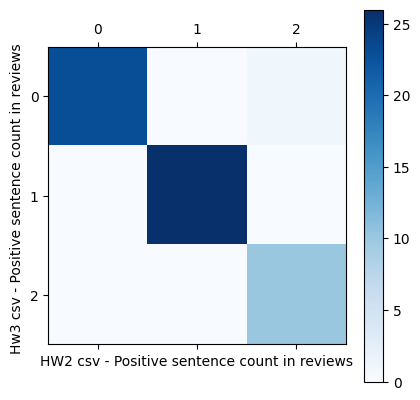

In [ ]:
# Plotting confusion matrix using matshow function from matplotlib
plt.matshow(cm, cmap=plt.cm.Blues)

# Adding colorbar to the plot
plt.colorbar()


# Adding labels to x-axis and y-axis of the plot
plt.xlabel("True labels")
plt.ylabel("Predicted labels ")


plt.show()

In [ ]:
# Obtaining a score of how much do two data sets match 
total_obs = np.sum(cm)
correct_classifications = np.diagonal(cm)
match_rate = np.sum(correct_classifications) / total_obs
print(match_rate)

0.9833333333333333


##Testing BiLSTM + Elmo on the New Dataset

For prediction purposes we use News Category Dataset from Kaggle, which is a collection of news articles published over a period of three years from 2012 to 2015. The dataset includes over 200,000 articles from over 200 different news sources, and is often used for text classification and natural language processing tasks. The dataset has comparable labels, which makes it easy for us to check the accuracy of predictions



In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adilmayo","key":"3c772556c90a929fa5c9da2d1afaabcb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset


 83% 22.0M/26.5M [00:00<00:00, 113MB/s] 
100% 26.5M/26.5M [00:00<00:00, 115MB/s]


In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset


news-category-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip news-category-dataset.zip



Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


In [ ]:
import pandas as pd
df_f = pd.read_json('News_Category_Dataset_v3.json', lines=True)

In [ ]:
#this code is selecting only the rows from the original dataframe that belong to the specified categories and creating a new dataframe with these rows
categories = ['POLITICS', 'ENTERTAINMENT', 'SPORTS', 'BUSINESS', 'TECH']
filtered_df = df_f[df_f['category'].isin(categories)]

In [ ]:
filtered_df = filtered_df.drop(columns=['link', 'headline', 'authors', 'date']) #dropping uneccassary columns


In [ ]:
filtered_df['category'] = filtered_df['category'].apply(lambda x: x.lower()) #lowercasing the data

In [ ]:
filtered_df.reset_index(inplace=True)

In [ ]:
filtered_df = filtered_df.drop(columns=['index'])

In [ ]:
filtered_df.head(10)

,category,short_description
0,tech,One man's claims that he scammed people on the...
1,sports,"Maury Wills, who helped the Los Angeles Dodger..."
2,entertainment,"For the past 18 months, Hollywood has effectiv..."
3,politics,President issues vow as tensions with China rise.
4,politics,An annual celebration took on a different feel...
5,sports,Las Vegas never had a professional sports cham...
6,entertainment,"The ""Avatar"" director said aspects of his 2009..."
7,politics,"U.S. President Joe Biden, in London for the fu..."
8,entertainment,The director of the original 1982 film joins a...
9,politics,Republican outrage over the shoddy U.S. withdr...


In [ ]:
# print(filtered_df[filtered_df['category'] == 'SPORT'])

In [ ]:
#We are choosing 400 articles per tag

df_p = filtered_df[filtered_df['category'] == 'politics'][:400].copy()
df_t = filtered_df[filtered_df['category'] == 'tech'][:400].copy()
df_s = filtered_df[filtered_df['category'] == 'sports'][:400].copy()

In [ ]:
df_p =  df_p[:400].copy()
df_t =  df_t[:400].copy()
df_s =  df_s[:400].copy()

In [ ]:
len(df_s)

400

In [ ]:
final = pd.concat([df_p, df_t, df_s])


In [ ]:
final.head()

,category,short_description
3,politics,President issues vow as tensions with China rise.
4,politics,An annual celebration took on a different feel...
7,politics,"U.S. President Joe Biden, in London for the fu..."
9,politics,Republican outrage over the shoddy U.S. withdr...
11,politics,The former White House chief of staff has turn...


In [ ]:
len(final)

1200

In [ ]:

def prep(df, column):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # remove punctuation
    df[column] = df[column].apply(lambda x: x.lower()) # convert text to lowercase
    df[column] = df[column].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stop_words]) # tokenize and remove stopwords
    df[column] = df[column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) # lemmatize each word
    df[column] = df[column].apply(lambda x: ' '.join(x)) # join the list of words back into a single string
    return df


prep(final, "short_description")

,category,short_description
3,politics,president issue vow tension china rise
4,politics,annual celebration took different feel russia ...
7,politics,u president joe biden london funeral queen eli...
9,politics,republican outrage shoddy u withdrawal afghani...
11,politics,former white house chief staff turned record p...
...,...,...
7962,sports,became first person win three gold medal olymp...
7963,sports,im saying weve never seen place time
7965,sports,gracie gold vincent zhou chris knierim jeffrey...
7967,sports,later admitted poor choice word


In [ ]:
#In this code snippet, we are using the sample() method of the DataFrame with the following arguments:
#frac=1: This specifies that we want to sample the entire DataFrame, i.e., use all the rows.
#random_state=42: This sets the random seed to a fixed value, ensuring that the results are reproducible.
import random
shuffled_df = final.sample(frac=1, random_state=42)

In [ ]:
shuffled_df.head()

,category,short_description
7892,sports,youre 28 year old skating best ever life expla...
631,sports,really long journey embracing gender pair skat...
192,politics,democratic pennsylvania senate nominee found c...
5271,tech,facebook engineer fired allegedly selfidentify...
112,politics,two veteran new york democrat previously dodge...


In [ ]:
lst = [shuffled_df[i:i + 100] for i in range(0,shuffled_df.shape[0], 100)]


In [ ]:
elmo_f = [embedding_elmo(x['short_description']) for x in lst]


In [ ]:
import numpy as np
elmo_f_new = np.concatenate(elmo_f, axis = 0)

In [ ]:
elmo_f_new = elmo_f_new.reshape(elmo_f_new.shape[0], 1, elmo_f_new.shape[1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Predicting the labels of the test set using the trained model
y_pred = model_e.predict(elmo_f_new)


In [ ]:
y_pred

array([[1.3196921e-01, 8.4932393e-01, 1.8706812e-02],
       [4.1286447e-03, 9.9542433e-01, 4.4703129e-04],
       [2.1611031e-03, 4.0941224e-02, 9.5689762e-01],
       ...,
       [2.2677107e-01, 2.4940084e-01, 5.2382815e-01],
       [1.3537425e-05, 9.9978256e-01, 2.0393032e-04],
       [1.5686586e-01, 4.7893929e-01, 3.6419475e-01]], dtype=float32)

In [ ]:
# Define a list of category labels in the order that they appear in the y_pred array
final_labels = unique_categories
# Get the index of the maximum value in each row of the y_pred array
max_indices = np.argmax(y_pred, axis=1)

# Use the index to look up the corresponding category label in the list
predicted_labels = [final_labels[i] for i in max_indices]

# Print the predicted labels
for i, label in enumerate(predicted_labels):
    print("Sample {}: {}".format(i+1, label))


Sample 1: sport
Sample 2: sport
Sample 3: politics
Sample 4: tech
Sample 5: politics
Sample 6: sport
Sample 7: politics
Sample 8: sport
Sample 9: tech
Sample 10: sport
Sample 11: politics
Sample 12: politics
Sample 13: politics
Sample 14: sport
Sample 15: tech
Sample 16: politics
Sample 17: politics
Sample 18: sport
Sample 19: sport
Sample 20: tech
Sample 21: politics
Sample 22: politics
Sample 23: tech
Sample 24: politics
Sample 25: politics
Sample 26: tech
Sample 27: tech
Sample 28: tech
Sample 29: politics
Sample 30: tech
Sample 31: politics
Sample 32: sport
Sample 33: tech
Sample 34: politics
Sample 35: politics
Sample 36: tech
Sample 37: tech
Sample 38: tech
Sample 39: sport
Sample 40: tech
Sample 41: sport
Sample 42: tech
Sample 43: politics
Sample 44: politics
Sample 45: tech
Sample 46: politics
Sample 47: politics
Sample 48: tech
Sample 49: politics
Sample 50: politics
Sample 51: sport
Sample 52: tech
Sample 53: tech
Sample 54: tech
Sample 55: sport
Sample 56: tech
Sample 57: s

In [ ]:
shuffled_df['predicted_labels'] = predicted_labels

In [ ]:
shuffled_df.head()

,category,short_description,predicted_labels
7892,sports,youre 28 year old skating best ever life expla...,sport
631,sports,really long journey embracing gender pair skat...,sport
192,politics,democratic pennsylvania senate nominee found c...,politics
5271,tech,facebook engineer fired allegedly selfidentify...,tech
112,politics,two veteran new york democrat previously dodge...,politics


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assigning 'text_positive' column from df to y_true
y_true = shuffled_df['category']

# Assigning 'R_pos_count' column from merged to y_pred
y_pred = shuffled_df['predicted_labels']

# Calculating confusion matrix
cm = confusion_matrix(y_true, y_pred)


In [ ]:
# Obtaining a score of how much do two data sets match 
total_obs = np.sum(cm)
correct_classifications = np.diagonal(cm)
match_rate = np.sum(correct_classifications) / total_obs
print(match_rate)

0.4791666666666667


##BiLSTM + BERT 


In [ ]:
!pip install transformers
!pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])
df.head()

,category,text,tokenized_text,label
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst...",2
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,...",1
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...",1
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hit, back, mongrel, jibe, michael, ho...",0
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepares, name, poll, date, tony, blai...",0


In [ ]:
print(df['label'].unique())


[2 1 0]


In [ ]:
df = df.iloc[:500]

The function generate_bert_embeddings takes a list of texts, a maximum sequence length, a tokenizer, and a BERT model as inputs. It encodes the texts using the tokenizer, truncates them if they exceed the maximum sequence length, pads them to the maximum sequence length, and generates embeddings using the BERT model. The embeddings are returned as a tensor.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


def generate_bert_embeddings(texts, max_seq_length, tokenizer, model):
    """
    Generates BERT embeddings for a list of texts using a given tokenizer and model.
    Returns the embeddings as a tensor.
    """
    
    # Encode the texts using the tokenizer and truncate if they exceed the maximum sequence length
    encoded_texts = [tokenizer.encode(text, add_special_tokens=True, max_length=max_seq_length, truncation=True) for text in texts]
    
    # Pad the encoded texts to the maximum sequence length
    padded_texts = pad_sequences(encoded_texts, maxlen=max_seq_length, padding='post', truncating='post')
    
    # Generate the embeddings using the BERT model
    embeddings = model(padded_texts)[0]
    
    return embeddings

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
import numpy as np

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Load the BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Generate BERT embeddings for the texts
max_seq_length = 100
train_embeddings = generate_bert_embeddings(train_texts, max_seq_length, bert_tokenizer, bert_model)
test_embeddings = generate_bert_embeddings(test_texts, max_seq_length, bert_tokenizer, bert_model)

num_classes = len(set(train_labels))

# Define the BiLSTM model architecture
model = Sequential([
    Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(max_seq_length, 768))),
    Dense(units=32, activation='sigmoid'),
    Dropout(0.2),
    Dense(units=num_classes, activation='softmax')
])

#experimented with relu and sigmoid
#relu generated an accuracy of about 93% whereas the sigmoid function yielded an accuracy of 97% so we keep that

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
#the learning rate seems to be optimal because we achieve similar accuracies on both our training, validation, and testing set. 

# Train the model
batch_size = 32
num_epochs = 10
history = model.fit(train_embeddings, train_labels, batch_size=batch_size, epochs=num_epochs, validation_data=(test_embeddings, test_labels))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_embeddings, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10
8/8 [==============================] - 14s 1s/step - loss: 1.1567 - accuracy: 0.3833 - val_loss: 0.7976 - val_accuracy: 0.7667
Epoch 2/10
8/8 [==============================] - 8s 904ms/step - loss: 0.6727 - accuracy: 0.8500 - val_loss: 0.4072 - val_accuracy: 0.9833
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.3464 - accuracy: 0.9750 - val_loss: 0.1904 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 8s 907ms/step - loss: 0.1919 - accuracy: 1.0000 - val_loss: 0.1300 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 7s 925ms/step - loss: 0.1262 - accuracy: 1.0000 - val_loss: 0.1092 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 8s 978ms/step - loss: 0.0979 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 8s 957ms/step - loss: 0.0808 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9667
Epoch 8/10
8/8 [=========

In [ ]:
model.save('my_model.h5')

In [ ]:
shuffled_df.head()

,category,short_description,tokenized_text,label
7892,sports,youre 28 year old skating best ever life expla...,"[youre, 28, year, old, skating, best, ever, li...",2
631,sports,really long journey embracing gender pair skat...,"[really, long, journey, embracing, gender, pai...",2
192,politics,democratic pennsylvania senate nominee found c...,"[democratic, pennsylvania, senate, nominee, fo...",1
5271,tech,facebook engineer fired allegedly selfidentify...,"[facebook, engineer, fired, allegedly, selfide...",0
112,politics,two veteran new york democrat previously dodge...,"[two, veteran, new, york, democrat, previously...",1


In [ ]:
def label_categories(category):
    if category == 'tech':
        return 0
    elif category == 'politics':
        return 1
    elif category == 'sports':
        return 2

In [ ]:
shuffled_df['label'] = shuffled_df['category'].apply(label_categories)

In [ ]:
#bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bert_model = TFBertModel.from_pretrained('bert-base-uncased')
max_seq_length = 100
df_subset = shuffled_df.head(100)

df_subset['embeddings'] = df_subset['short_description'].apply(lambda x: generate_bert_embeddings([x], max_seq_length, bert_tokenizer, bert_model))


<ipython-input-119-9d0ff207077a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['embeddings'] = df_subset['short_description'].apply(lambda x: generate_bert_embeddings([x], max_seq_length, bert_tokenizer, bert_model))


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved BiLSTM model
bilstm_model = load_model('my_model.h5')

# Apply the model to each embedding in the "embeddings" column
df_subset['pred'] = df_subset['embeddings'].apply(lambda x: np.argmax(bilstm_model.predict(x), axis=-1))

1/1 [==============================] - 0s 74ms/step


<ipython-input-120-06f43d893693>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['pred'] = df_subset['embeddings'].apply(lambda x: np.argmax(bilstm_model.predict(x), axis=-1))


In [ ]:
df_subset = df_subset.drop('embeddings', axis=1)


In [ ]:
df_subset.head(25)

,category,short_description,tokenized_text,label,pred
7892,sports,youre 28 year old skating best ever life expla...,"[youre, 28, year, old, skating, best, ever, li...",2,[2]
631,sports,really long journey embracing gender pair skat...,"[really, long, journey, embracing, gender, pai...",2,[2]
192,politics,democratic pennsylvania senate nominee found c...,"[democratic, pennsylvania, senate, nominee, fo...",1,[2]
5271,tech,facebook engineer fired allegedly selfidentify...,"[facebook, engineer, fired, allegedly, selfide...",0,[2]
112,politics,two veteran new york democrat previously dodge...,"[two, veteran, new, york, democrat, previously...",1,[2]
7742,sports,kind given dont fall nbcs terry gannon say,"[kind, given, dont, fall, nbcs, terry, gannon,...",2,[2]
598,politics,indiana state police investigating campus offi...,"[indiana, state, police, investigating, campus...",1,[2]
3980,sports,fan hope last ring pick season,"[fan, hope, last, ring, pick, season]",2,[2]
3463,tech,billionaire salesforce ceo denounced social me...,"[billionaire, salesforce, ceo, denounced, soci...",0,[2]
599,sports,everyone snowboard know missed grab im hiding ...,"[everyone, snowboard, know, missed, grab, im, ...",2,[2]


##Conclusion and Challanges

Challenges: 
One of the primary challenges we faced when training our Bidirectional LSTM (BiLSTM) model was limited computational power. It is well-known that large datasets of several thousand examples are typically necessary for training BiLSTM models effectively for natural language processing tasks, such as text classification or sentiment analysis.

Despite this recommendation, we were only able to use a small dataset of 300 articles due to computational constraints. This limited dataset resulted in a significant drop in model performance on new, unseen data compared to its performance on the validation and test sets. While the model achieved an accuracy of above 90% on the validation and test sets, its accuracy dropped to around 50% when evaluated on new data.

Based on our analysis of the results, it appears that the poor performance of the model on new, unseen data can be attributed to overfitting. The small dataset size likely resulted in the model becoming too specialized to the training data, and as a result, was unable to generalize well to new data. 

We also ruled out any problems with biased datasets since we curated the dataset to be representative of different classes in equal amounts. 

To mitigate the overfitting issue, we attempted to experiment with different combinations of dropout rates and epoch sizes, but were unable to identify a set of hyperparameters that improved the model's performance. Consequently, we recommend that researchers and practitioners take into account the size of the dataset when training BiLSTM models, as a larger dataset is likely to yield more accurate results.

In summary, while smaller datasets can still produce useful results, a sufficiently large dataset is recommended for training BiLSTM models to achieve optimal performance. This can help avoid the issue of overfitting and ensure that the model generalizes well to new, unseen data.
